<a href="https://colab.research.google.com/github/matheusfigueiredoo/detection-of-cyber-attacks/blob/main/uniquedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import csv

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train = pd.read_csv("drive/MyDrive/MQTTset/train70_augmented.csv")
test = pd.read_csv("drive/MyDrive/MQTTset/test30_augmented.csv")

In [6]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [7]:
# distribuição das targets
print(train['target'].value_counts())
print(test['target'].value_counts())

target
legitimate    7000000
bruteforce    1400000
flood         1400000
slowite       1400000
dos           1400000
malformed     1400000
Name: count, dtype: int64
target
legitimate    3000000
dos            600000
slowite        600000
flood          600000
bruteforce     600000
malformed      600000
Name: count, dtype: int64


In [8]:
# concatenação de dataframes

first_data = pd.concat([train, test], ignore_index=True)   # 1a concatenação

print(first_data['target'].value_counts)

<bound method IndexOpsMixin.value_counts of 0           legitimate
1           bruteforce
2                flood
3              slowite
4                flood
               ...    
19999995         flood
19999996    legitimate
19999997    legitimate
19999998    bruteforce
19999999    legitimate
Name: target, Length: 20000000, dtype: object>


In [9]:
second_data = pd.concat([first_data, test], ignore_index=True)     # 2a concatenação

print(second_data['target'].value_counts())

target
legitimate    13000000
bruteforce     2600000
flood          2600000
slowite        2600000
dos            2600000
malformed      2600000
Name: count, dtype: int64


In [10]:
third_data = pd.concat([second_data, first_data], ignore_index=True)   # 3a concatenação

print(third_data['target'].value_counts())

target
legitimate    23000000
bruteforce     4600000
flood          4600000
slowite        4600000
dos            4600000
malformed      4600000
Name: count, dtype: int64


In [11]:
fourth_data = pd.concat([second_data, third_data], ignore_index=True)   # 4a concatenação

print(fourth_data['target'].value_counts())

target
legitimate    36000000
bruteforce     7200000
flood          7200000
slowite        7200000
dos            7200000
malformed      7200000
Name: count, dtype: int64


In [14]:
five_data = pd.concat([fourth_data, third_data], ignore_index=True)   # 5a concatenação

print(five_data['target'].value_counts())

target
legitimate    59000000
bruteforce    11800000
flood         11800000
slowite       11800000
dos           11800000
malformed     11800000
Name: count, dtype: int64


In [15]:
data = pd.concat([fourth_data, five_data], ignore_index=True)   # 6a concatenação

print(data['target'].value_counts())

target
legitimate    95000000
bruteforce    19000000
flood         19000000
slowite       19000000
dos           19000000
malformed     19000000
Name: count, dtype: int64


In [16]:
# balanceamento dos dados
rows = []

for i in data.index:
    if data['target'][i] == 'legitimate':
        rows.append(i)

rows = rows[:76000000]
data = data.drop(rows)
print(data['target'].value_counts())

target
bruteforce    19000000
flood         19000000
slowite       19000000
dos           19000000
malformed     19000000
legitimate    19000000
Name: count, dtype: int64


In [17]:
# pre processamento de dados
# separacao de features e targets

X = data.iloc[:,:-1]
y = data['target']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)

In [19]:
# transformacao de features e targets categoricas em numeros inteiros

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [20]:
# features
X_train['tcp.flags'] = label.fit_transform(X_train['tcp.flags'])
X_train['mqtt.conack.flags'] = label.fit_transform(X_train['mqtt.conack.flags'])
X_train['mqtt.hdrflags'] = label.fit_transform(X_train['mqtt.hdrflags'])
X_train['mqtt.protoname'] = label.fit_transform(X_train['mqtt.protoname'])
X_train['mqtt.msg'] = label.fit_transform(X_train['mqtt.msg'])
X_train['mqtt.conflags'] = label.fit_transform(X_train['mqtt.conflags'])

X_test['tcp.flags'] = label.fit_transform(X_test['tcp.flags'])
X_test['mqtt.conack.flags'] = label.fit_transform(X_test['mqtt.conack.flags'])
X_test['mqtt.hdrflags'] = label.fit_transform(X_test['mqtt.hdrflags'])
X_test['mqtt.protoname'] = label.fit_transform(X_test['mqtt.protoname'])
X_test['mqtt.msg'] = label.fit_transform(X_test['mqtt.msg'])
X_test['mqtt.conflags'] = label.fit_transform(X_test['mqtt.conflags'])

# targets
label.fit(y_train)
label.fit(y_test)
y_train = label.transform(y_train)
y_test = label.transform(y_test)

In [21]:
# ajuste de dados

# columns_0 são as colunas com dados iguais a 0

columns_0 = ['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conflag.qos',
           'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.willflag',
           'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len',
           'mqtt.willtopic', 'mqtt.willtopic_len']

X_train = X_train.drop(columns_0, axis=1)
X_test = X_test.drop(columns_0, axis=1)


print(X_train.shape)
print(X_test.shape)

(85500000, 20)
(28500000, 20)


In [22]:
X_train = X_train.values
X_test = X_test.values

print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)

clf.fit(X_train, y_train)

print("Accuracy train: {}".format(clf.score(X_train, y_train)))
print("Accuracy test: {}".format(clf.score(X_test, y_test)))

Accuracy train: 0.8798754736842105
Accuracy test: 0.8799122456140351


In [25]:
# metrics

from sklearn.metrics import classification_report

# predição de valores

predict = clf.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83   4746510
           1       0.91      0.89      0.90   4748975
           2       0.87      0.88      0.88   4749564
           3       0.85      0.90      0.88   4751165
           4       0.89      0.73      0.80   4751208
           5       1.00      1.00      1.00   4752578

    accuracy                           0.88  28500000
   macro avg       0.88      0.88      0.88  28500000
weighted avg       0.88      0.88      0.88  28500000



In [26]:
# confusion matrix

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, predict)
print(matrix)

[[4187473  204004    9643    3741  341649       0]
 [  60477 4220661  163575  221588   82674       0]
 [   9504   37964 4188847  503722    9527       0]
 [    519   65803  402782 4278797    3264       0]
 [1115258  126227   44645   15935 3449143       0]
 [      0       0       0       0       0 4752578]]


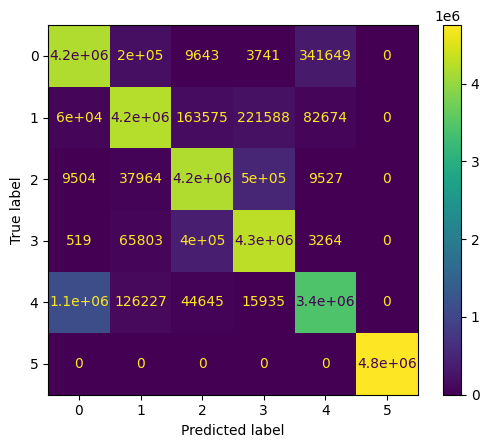

In [27]:
# display matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()